Import all the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, accuracy_score

# from pandas_profiling import ProfileReport

Import files used to train the model

In [2]:
df = pd.read_excel(r'C:\Users\barte\Documents\probkauczaca.xlsx')

In [3]:
df_2 = pd.read_excel(r'C:\Users\barte\Documents\probkatestowa.xlsx')

In [4]:
df = pd.concat([df, df_2])

In [5]:
df.head()

,CNT_ID,Default,Przychody,Suma_bilansowa,Liczba_prawcownikow,OBT_Type2,OBT_IFNEW,Rok_produkcji,Czy_autoryzowany_dostawca,CNT_WPPLN,...,WojewodztwoLU,GenezaSpolecznosci_ZO,GenezaSpolecznosci_ZN,GenezaSpolecznosci_ZA,GenezaSpolecznosci_ZR,GenezaSpolecznosci_WS,Poglady_PP,Poglady_X,Auto_luksusowe,Branza
0,2,0,0,0,0,Cars,New,0,T,77282.79,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,NaN,Handel
1,41,1,0,0,1,Truck & Trailer,New,0,N,115600.00,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,NaN,Handel
2,61,0,0,0,0,Cars,New,0,T,77282.79,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,NaN,Handel
3,121,0,0,0,1,Truck & Trailer,New,0,N,111552.64,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,NaN,Transport
4,241,1,3150000,0,15,Truck & Trailer,New,0,N,469589.40,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN,Usługi


In [6]:
#!pip install https://github.com/ydataai/pandas-profiling/archive/master.zip

In [7]:
#prof = ProfileReport(df)
#prof.to_file(output_file='output.html')

Creating a correlation matrix using the Spearman method in case of outliers

In [8]:
correlation = df.corr(method = 'spearman')

C:\Users\barte\AppData\Local\Temp\ipykernel_3872\299807053.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr(method = 'spearman')


In [9]:
correlation['Default'].sort_values()

C16_Mcy_od_poczatku_nieaktywnosci   -0.793857
C18_Mcy_od_Zmiana_adresu            -0.287567
Przychody                           -0.231880
C20_Mcy_od_Zmiana_wlascicieli       -0.222563
C07_Liczba_osob_w_zarzadzie         -0.210779
                                       ...   
P_KodP_13                                 NaN
P_KodP_17                                 NaN
P_KodP_68                                 NaN
P_KodP_79                                 NaN
Auto_luksusowe                            NaN
Name: Default, Length: 401, dtype: float64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14000 entries, 0 to 3999
Columns: 417 entries, CNT_ID to Branza
dtypes: float64(389), int64(12), object(16)
memory usage: 44.6+ MB


In [11]:
df.shape

(14000, 417)

In [12]:
df['Default'].value_counts(dropna=False)

0    10500
1     3500
Name: Default, dtype: int64

In [13]:
df.isnull().mean()

CNT_ID                   0.000000
Default                  0.000000
Przychody                0.000000
Suma_bilansowa           0.000000
Liczba_prawcownikow      0.000000
                           ...   
GenezaSpolecznosci_WS    0.143714
Poglady_PP               0.143714
Poglady_X                0.143714
Auto_luksusowe           0.976929
Branza                   0.000000
Length: 417, dtype: float64

Replacing all NULLs with zeros

In [14]:
df = df.fillna(-1)

In [15]:
df

,CNT_ID,Default,Przychody,Suma_bilansowa,Liczba_prawcownikow,OBT_Type2,OBT_IFNEW,Rok_produkcji,Czy_autoryzowany_dostawca,CNT_WPPLN,...,WojewodztwoLU,GenezaSpolecznosci_ZO,GenezaSpolecznosci_ZN,GenezaSpolecznosci_ZA,GenezaSpolecznosci_ZR,GenezaSpolecznosci_WS,Poglady_PP,Poglady_X,Auto_luksusowe,Branza
0,2,0,0,0,0,Cars,New,0,T,77282.79,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-1.0,Handel
1,41,1,0,0,1,Truck & Trailer,New,0,N,115600.00,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-1.0,Handel
2,61,0,0,0,0,Cars,New,0,T,77282.79,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-1.0,Handel
3,121,0,0,0,1,Truck & Trailer,New,0,N,111552.64,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-1.0,Transport
4,241,1,3150000,0,15,Truck & Trailer,New,0,N,469589.40,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-1.0,Usługi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,92379,1,0,0,33,Truck & Trailer,New,0,T,90338.82,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-1.0,Transport
3996,92809,0,989776,0,11,Cars,New,0,T,36016.26,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,Medycyna
3997,93770,0,16014354,9112929,49,Truck & Trailer,Used,1,N,274625.00,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-1.0,Transport
3998,93864,0,0,0,1,Cars,New,0,T,54390.24,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,Budownictwo


In [16]:
df.isnull().mean()

CNT_ID                   0.0
Default                  0.0
Przychody                0.0
Suma_bilansowa           0.0
Liczba_prawcownikow      0.0
                        ... 
GenezaSpolecznosci_WS    0.0
Poglady_PP               0.0
Poglady_X                0.0
Auto_luksusowe           0.0
Branza                   0.0
Length: 417, dtype: float64

In [17]:
correlation_2 = df.corr(method = 'spearman')

C:\Users\barte\AppData\Local\Temp\ipykernel_3872\2781342699.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_2 = df.corr(method = 'spearman')


In [18]:
correlation_2['Default'].sort_values()

Przychody                      -0.231880
Suma_bilansowa                 -0.183375
Liczba_prawcownikow            -0.179979
CzasDzialalnosciMce            -0.172945
CNT_ID                         -0.163832
                                  ...   
MARZA                           0.216023
Okres_umowy                     0.233063
S06_Nie_jest_podatnikiem_VAT    0.453389
Default                         1.000000
S38_Czarna_lista_powiazane           NaN
Name: Default, Length: 401, dtype: float64

Now let's remove all columns that contain only -1

In [19]:
df = df.drop(columns=df.columns[(df == -1).all()])

In [20]:
df

,CNT_ID,Default,Przychody,Suma_bilansowa,Liczba_prawcownikow,OBT_Type2,OBT_IFNEW,Rok_produkcji,Czy_autoryzowany_dostawca,CNT_WPPLN,...,WojewodztwoLU,GenezaSpolecznosci_ZO,GenezaSpolecznosci_ZN,GenezaSpolecznosci_ZA,GenezaSpolecznosci_ZR,GenezaSpolecznosci_WS,Poglady_PP,Poglady_X,Auto_luksusowe,Branza
0,2,0,0,0,0,Cars,New,0,T,77282.79,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-1.0,Handel
1,41,1,0,0,1,Truck & Trailer,New,0,N,115600.00,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-1.0,Handel
2,61,0,0,0,0,Cars,New,0,T,77282.79,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-1.0,Handel
3,121,0,0,0,1,Truck & Trailer,New,0,N,111552.64,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-1.0,Transport
4,241,1,3150000,0,15,Truck & Trailer,New,0,N,469589.40,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-1.0,Usługi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,92379,1,0,0,33,Truck & Trailer,New,0,T,90338.82,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-1.0,Transport
3996,92809,0,989776,0,11,Cars,New,0,T,36016.26,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,Medycyna
3997,93770,0,16014354,9112929,49,Truck & Trailer,Used,1,N,274625.00,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-1.0,Transport
3998,93864,0,0,0,1,Cars,New,0,T,54390.24,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,Budownictwo


In [21]:
correlation_3 = df.corr(method = 'spearman')

C:\Users\barte\AppData\Local\Temp\ipykernel_3872\1288722178.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_3 = df.corr(method = 'spearman')


First 50 negative correlations

In [22]:
sorted_correlations = correlation_3['Default'].sort_values()
first_50 = sorted_correlations[:50]
print(first_50)

Przychody                              -0.231880
Suma_bilansowa                         -0.183375
Liczba_prawcownikow                    -0.179979
CzasDzialalnosciMce                    -0.172945
CNT_ID                                 -0.163832
OWPRC                                  -0.107784
WojewodztwoSW                          -0.060187
K_KodP_45                              -0.058900
D_KodP_20                              -0.057924
C08_Liczba_obcokrajowcow_w_zarzadzie   -0.057762
GenezaSpolecznosci_ZR                  -0.056984
K_KodP_26                              -0.055346
WojewodztwoOP                          -0.053379
WojewodztwoLU                          -0.052651
C10_Liczba_wlascicieli                 -0.051397
D_KodP_03                              -0.050488
K_KodP_04                              -0.050097
K_KodP_46                              -0.049841
K_KodP_25                              -0.049324
K_KodP_02                              -0.049240
K_KodP_21           

First 50 positive correlations

In [23]:
last_50 = sorted_correlations[-50:]
print(last_50)

K_KodP_81                                     0.001928
C18_Mcy_od_Zmiana_adresu                      0.004494
C25_AdresKlientaWystepujePrzyInnychFirmach    0.006112
C22_Mcy_od_Zmiana_przekszt                    0.007216
D_KodP_02                                     0.007316
S10_Ryzykowne_PKD                             0.007453
P_KodP_05                                     0.008388
S37_Czarna_lista_klient                       0.012549
S12_Uzywany_nietypowy_PL                      0.012950
C16_Mcy_od_poczatku_nieaktywnosci             0.013031
S26_Odrzucone_wnioski_powiazanych_12Mcy       0.014405
S49_gieldy_dlugow_dostawca                    0.015278
S10a_Liczba_PKD                               0.016008
K_KodP_00                                     0.016707
Kapital                                       0.019327
S05_Start_up                                  0.019783
S53_zadluzenie_w_dziale_4_krs                 0.029922
S20_Wysoka_prowizja_posrednika_HV_New         0.032102
S48_gieldy

Division of data into a data frame with columns through which we make predictions

In [24]:
x_data = pd.DataFrame(first_50)

In [25]:
last_50_df = pd.DataFrame(last_50)

In [26]:
x_data = pd.concat([x_data, last_50_df])

In [27]:
x_data

,Default
Przychody,-0.231880
Suma_bilansowa,-0.183375
Liczba_prawcownikow,-0.179979
CzasDzialalnosciMce,-0.172945
CNT_ID,-0.163832
...,...
S46_transakcje_windykowane_dostawcy,0.175672
MARZA,0.216023
Okres_umowy,0.233063
S06_Nie_jest_podatnikiem_VAT,0.453389


In [28]:
x_data = df[x_data.index]

In [29]:
x_data = x_data.iloc[:, :-1]

In [30]:
x_data

,Przychody,Suma_bilansowa,Liczba_prawcownikow,CzasDzialalnosciMce,CNT_ID,OWPRC,WojewodztwoSW,K_KodP_45,D_KodP_20,C08_Liczba_obcokrajowcow_w_zarzadzie,...,S02_nowy_klient_nowy_dostawca,S16_Akceptacja_wysokiej_marzy_HV_Used,S24_Odrzucone_wnoski_12Mcy,Rok_produkcji,PROWIZJA,Admin,S46_transakcje_windykowane_dostawcy,MARZA,Okres_umowy,S06_Nie_jest_podatnikiem_VAT
0,0,0,0,100.0,2,10,0.0,0.0,0.0,7.0,...,-1.0,-1.0,-1.0,0,0.000000,0.499995,-1.0,2.51,36,-1.0
1,0,0,1,119.0,41,7,0.0,0.0,0.0,0.0,...,1.0,-1.0,-1.0,0,1.860000,3.000000,-1.0,3.20,48,1.0
2,0,0,0,100.0,61,10,0.0,0.0,0.0,7.0,...,-1.0,-1.0,-1.0,0,0.000000,0.499995,-1.0,2.51,36,-1.0
3,0,0,1,91.0,121,9,0.0,0.0,0.0,-1.0,...,1.0,-1.0,-1.0,0,0.000000,0.499997,-1.0,2.60,60,1.0
4,3150000,0,15,50.0,241,8,0.0,0.0,0.0,0.0,...,1.0,-1.0,-1.0,0,1.854603,3.023810,-1.0,4.00,48,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0,0,33,2.0,92379,11,0.0,0.0,0.0,1.0,...,-1.0,-1.0,-1.0,0,0.118720,0.237439,1.0,3.10,59,-1.0
3996,989776,0,11,-1.0,92809,9,-1.0,0.0,0.0,0.0,...,-1.0,-1.0,-1.0,0,0.999993,0.999993,1.0,3.00,59,-1.0
3997,16014354,9112929,49,26.0,93770,20,0.0,0.0,0.0,1.0,...,-1.0,-1.0,-1.0,1,0.118343,0.000000,-1.0,2.80,72,-1.0
3998,0,0,1,-1.0,93864,14,-1.0,0.0,0.0,0.0,...,-1.0,-1.0,-1.0,0,0.000000,0.999996,-1.0,4.00,59,-1.0


In [31]:
y_data = df.Default

In [32]:
y_data

0       0
1       1
2       0
3       0
4       1
       ..
3995    1
3996    0
3997    0
3998    0
3999    0
Name: Default, Length: 14000, dtype: int64

Division of data into training and test data (the size of test data is 25%)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.25, random_state = 71)

# Random Forest Classifier

In [34]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

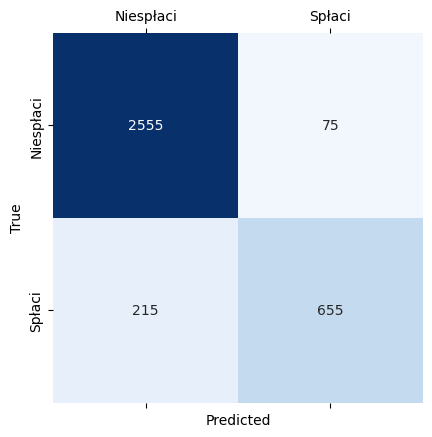

In [35]:
cm = confusion_matrix(y_test, pred_rfc)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
labels = ['Niespłaci', 'Spłaci']
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [36]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      2630
           1       0.90      0.75      0.82       870

    accuracy                           0.92      3500
   macro avg       0.91      0.86      0.88      3500
weighted avg       0.92      0.92      0.91      3500



# Logistic regression

In [37]:
reg_log = LogisticRegression()
reg_log.fit(X_train, y_train)

pred_skl = reg_log.predict(X_test)

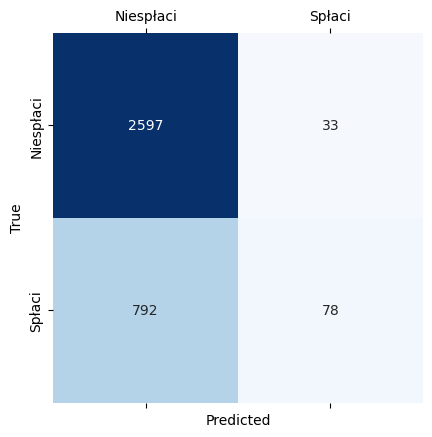

In [38]:
cm = confusion_matrix(y_test, pred_skl)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
labels = ['Niespłaci', 'Spłaci']
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [39]:
print(classification_report(y_test, pred_skl))

              precision    recall  f1-score   support

           0       0.77      0.99      0.86      2630
           1       0.70      0.09      0.16       870

    accuracy                           0.76      3500
   macro avg       0.73      0.54      0.51      3500
weighted avg       0.75      0.76      0.69      3500



Recall for repayment is 0.09, which means poor model quality.

# Cross-validation

Random Forest Classifier

In [40]:
predictions_rfc = cross_val_predict(rfc, x_data, y_data, cv=5)

In [41]:
print(classification_report(y_data, predictions_rfc))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93     10500
           1       0.85      0.73      0.78      3500

    accuracy                           0.90     14000
   macro avg       0.88      0.84      0.86     14000
weighted avg       0.90      0.90      0.90     14000



Logistic regression

In [42]:
predictions_skl = cross_val_predict(reg_log, x_data, y_data, cv=5)

In [43]:
print(classification_report(y_data, predictions_skl))

              precision    recall  f1-score   support

           0       0.77      0.97      0.86     10500
           1       0.58      0.15      0.23      3500

    accuracy                           0.76     14000
   macro avg       0.68      0.56      0.55     14000
weighted avg       0.73      0.76      0.70     14000



# Alignment of training data

In [44]:
value_counts = df['Default'].value_counts(dropna=False)
value_0 = value_counts[0]
value_1 = value_counts[1]

In [45]:
df_0 = df[df['Default'] == 0].sample(n=min(value_0, value_1))
df_1 = df[df['Default'] == 1].sample(n=min(value_0, value_1))

In [46]:
df_sampled = pd.concat([df_0, df_1])

After equating data 0 and 1 to 3500 pieces, we repeat the previous steps

In [47]:
correlation_4 = df_sampled.corr(method = 'spearman')

C:\Users\barte\AppData\Local\Temp\ipykernel_3872\880867327.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_4 = df_sampled.corr(method = 'spearman')


In [48]:
sorted_correlations_2 = correlation_4['Default'].sort_values()
first_50 = sorted_correlations_2[:50]
last_50 = sorted_correlations_2[-50:]

In [49]:
x_data = pd.DataFrame(first_50)
last_50_df = pd.DataFrame(last_50)
x_data = pd.concat([x_data, last_50_df])
x_data = df_sampled[x_data.index]
x_data = x_data.iloc[:, :-1]

In [50]:
y_data = df_sampled.Default

In [51]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.25, random_state = 71)

# Random Forest Classifier

In [52]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

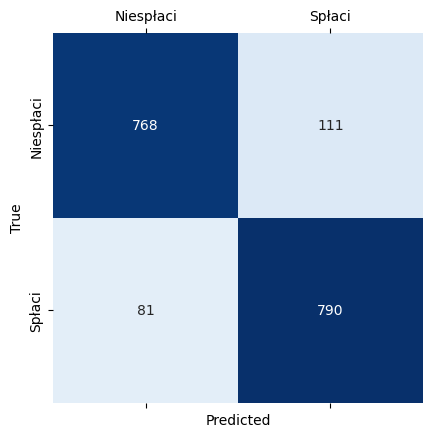

In [53]:
cm = confusion_matrix(y_test, pred_rfc)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
labels = ['Niespłaci', 'Spłaci']
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [54]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.90      0.87      0.89       879
           1       0.88      0.91      0.89       871

    accuracy                           0.89      1750
   macro avg       0.89      0.89      0.89      1750
weighted avg       0.89      0.89      0.89      1750



# Logistic regression

In [55]:
reg_log = LogisticRegression()
reg_log.fit(X_train, y_train)

pred_skl = reg_log.predict(X_test)

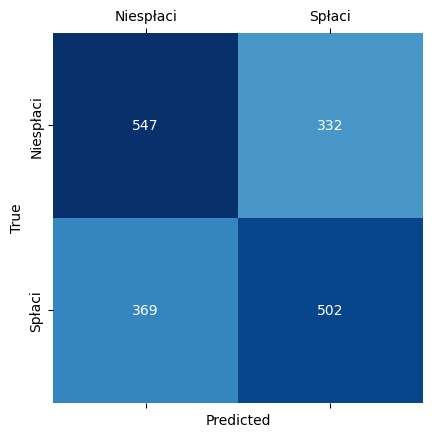

In [56]:
cm = confusion_matrix(y_test, pred_skl)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
labels = ['Niespłaci', 'Spłaci']
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [57]:
print(classification_report(y_test, pred_skl))

              precision    recall  f1-score   support

           0       0.60      0.62      0.61       879
           1       0.60      0.58      0.59       871

    accuracy                           0.60      1750
   macro avg       0.60      0.60      0.60      1750
weighted avg       0.60      0.60      0.60      1750



# Cross-validation

Random Forest Classifier

In [58]:
predictions_rfc = cross_val_predict(rfc, x_data, y_data, cv=5)

In [59]:
print(classification_report(y_data, predictions_rfc))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      3500
           1       0.88      0.90      0.89      3500

    accuracy                           0.88      7000
   macro avg       0.88      0.88      0.88      7000
weighted avg       0.88      0.88      0.88      7000



Logistic regression

In [60]:
predictions_skl = cross_val_predict(reg_log, x_data, y_data, cv=5)

In [61]:
print(classification_report(y_data, predictions_skl))

              precision    recall  f1-score   support

           0       0.60      0.67      0.63      3500
           1       0.63      0.56      0.59      3500

    accuracy                           0.61      7000
   macro avg       0.61      0.61      0.61      7000
weighted avg       0.61      0.61      0.61      7000

